### A big online retailer company “Amazing Zone” sells various products through their portal. One of the important feature of this business model is that the retailer takes responsibility of the shipment of the product. As the retailer takes guarantee that the purchased product will be delivered within promised timeline, customers are more inclined to purchase the products that has “Retailer fulfilled” tag associated with them. In order to keep the promise, the retailer has to invest heavily into the background shipment process that insures that the products are delivered to the customers before or on the guaranteed timeline. 

### The shipment process constitutes of several important components. The last mile delivery is carried out by the delivery boys, which are working on the company’s payroll. They are considered as critical because they are the one who faces the customer while delivering the product. They play an important role to increase the customer’s happiness by delivering the product before time, which improves upon the customer happiness index. 
### These delivery personnel’s are many times over-loaded with the task of the deliveries because of the traffic situations at the roads of the cities in which these deliveries are attempted. Due to these traffic situations, these delivery boys are not able to perform to their optimum limits on every business day. This is not a good sign for the company as this directly affects the last mile delivery of the products. 
### Currently the local distribution centers located in cities uses the static kind of scheduling technique to determine the delivery route for every delivery boy. That means, every morning the computer program prepares a delivery schedule for each delivery person which needs to be followed for completing the deliveries on the time. Many times, due to the traffic conditions on the roads, the delivery boys finds its challenging to complete the required number of deliveries which results into the delays in the whole process. To improve upon this behavior, the company is thinking of dynamic routing of the delivery personnel’s. That means, when they are on the roads, and if there are certain incident has happened on that route, then the boy will be informed about the same and also an updated route will be provided for him to follow.


## The data we have been provided with is in .arff format. We need to import this data and then modify it to readable format for our Machine learning model. We import the data from arff file and convert it into pandas dataframe.

In [1]:
import numpy as np
import pandas as pd
from scipy.io import arff
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from pylab import rcParams

In [2]:
import os
from io import StringIO
# Function for converting arff list to csv list
def toListObject(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        #print(line)
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    #print(header)
    return newContent

#Main loop for reading and writing files
    
def getDataFrameObject():
    newContent=[]
    with open('Behavior of the urban traffic - modified.arff' , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        newContent = toListObject(content)
    wholeString=''
    for eachLine in newContent:
       wholeString +=eachLine
    StringBuffer=StringIO(wholeString)
    df=pd.read_csv(StringBuffer)
    return df

In [3]:
df=getDataFrameObject()

In [4]:
df.head(10)

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,7:00,0.0,0.0,T,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,7:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,8:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,8:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,9:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1
5,9:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9
6,10:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3
7,10:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.2
8,11:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.6
9,11:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4


In [5]:
#As we can see, there is extra space in the few columns. We remove extra white spaces from the data
df.Vehicle_excess=df.Vehicle_excess.apply(lambda x: np.NaN if x==' ' else x.lstrip())
df.Accident_victim=df.Accident_victim.apply(lambda x: np.NaN if x==' ' else x.lstrip())
df.Running_over=df.Running_over.apply(lambda x: np.NaN if x==' ' else x.lstrip())
df.Fire_vehicles=df.Fire_vehicles.apply(lambda x: np.NaN if x==' ' else x.lstrip())
df.Incident_involving_dangerous_freight=df.Incident_involving_dangerous_freight.apply(lambda x: np.NaN if x==' ' else x.lstrip())
df.Defect_in_the_network_of_trolleybuses=df.Defect_in_the_network_of_trolleybuses.apply(lambda x: np.NaN if x==' ' else x.lstrip())
df.Semaphore_off=df.Semaphore_off.apply(lambda x: np.NaN if x==' ' else x.lstrip())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
Hour                                     140 non-null object
Immobilized_bus                          140 non-null float64
Broken_Truck                             140 non-null float64
Vehicle_excess                           140 non-null object
Accident_victim                          138 non-null object
Running_over                             140 non-null object
Fire_vehicles                            140 non-null object
Occurrence_involving_freight             140 non-null float64
Incident_involving_dangerous_freight     138 non-null object
Lack_of_electricity                      140 non-null float64
Fire                                     140 non-null float64
Point_of_flooding                        140 non-null float64
Manifestations                           140 non-null float64
Defect_in_the_network_of_trolleybuses    138 non-null object
Tree_on_the_road                  

## Data preparation: As part  of data preparation, we will be checking for the noise in data and then take the appropriate action.

In [7]:
df.Accident_victim.unique()

array(['0.0', '1.0', '2.0', '3.0', '-0.0', nan], dtype=object)

In [8]:
df.Running_over.unique()

array(['0.0', 'NO', '1.0', '2.0', '-1.0'], dtype=object)

In [9]:
#In above cell , we can see that Running_over has unique values 'No', so lets count the 'No'.
df['Running_over'][df['Running_over']=='NO'].count()

1

In [10]:
#Since the count of 'NO' is 1 we have to fixed it, we can delete the data row but as we have less data in the dataset
#So we will replace it with most occuring other value from 1,2,0
#occurrence of 1,2 and 0
print("zero's count in Running_over=",df['Running_over'][df['Running_over']=='0.0'].count())
print("One's count in Running_over=",df['Running_over'][df['Running_over']=='1.0'].count())
print("Two's count in Running_over=",df['Running_over'][df['Running_over']=='2.0'].count())

zero's count in Running_over= 124
One's count in Running_over= 13
Two's count in Running_over= 1


In [11]:
#Since the zeros' count is very high, we replace 'No' with zero
df.Running_over=df.Running_over.apply(lambda x: '0.0' if x=='NO' else x)

In [12]:
df.Running_over.unique()

array(['0.0', '1.0', '2.0', '-1.0'], dtype=object)

#### Similarly we chck for remaining features for the unique values and replace them with the most occurring values.

In [13]:
df.Incident_involving_dangerous_freight.unique()

array(['0.0', '1.0', nan], dtype=object)

In [14]:
df.Defect_in_the_network_of_trolleybuses.unique()

array(['0.0', '1.0', '3.0', '2.0', '-8.0', nan], dtype=object)

In [15]:
df.Semaphore_off.unique()

array(['0.0', '1.0', '2.0', '4.0', nan], dtype=object)

In [16]:
df.Accident_victim.unique()

array(['0.0', '1.0', '2.0', '3.0', '-0.0', nan], dtype=object)

In [17]:
#Converting object into appropriate data type
df['Accident_victim']=df['Accident_victim'].astype(str).astype(float)
df.Running_over=df.Running_over.astype(str).astype(float)
df.Incident_involving_dangerous_freight=df.Incident_involving_dangerous_freight.astype(str).astype(float)
df.Defect_in_the_network_of_trolleybuses=df.Defect_in_the_network_of_trolleybuses.astype(str).astype(float)
df.Semaphore_off=df.Semaphore_off.astype(str).astype(float)

In [18]:
df['Vehicle_excess'].unique()

array(['T', 'F', 'f'], dtype=object)

In [19]:
#since vehicle excess is categorical data and in regression all features should be in numerical data 
#so here mapping  categorical data into numerical data
df['Vehicle_excess']=df['Vehicle_excess'].map({'T':1,'F':0,'f':0})

In [20]:
df['Vehicle_excess'].unique()

array([1, 0], dtype=int64)

In [21]:
df.Fire_vehicles.unique()

array(['NO', '0.0', 'YES'], dtype=object)

In [22]:
#lets count 0.0 occurance in Fire_vehicles
print(df.Fire_vehicles[df.Fire_vehicles=='0.0'].count())
print(df.Fire_vehicles[df.Fire_vehicles=='NO'].count())
print(df.Fire_vehicles[df.Fire_vehicles=='YES'].count())

1
138
1


In [23]:
#replacing 0.0 with 'NO' in Fire_vehicles
df.Fire_vehicles=df.Fire_vehicles.replace('0.0','NO')

In [24]:
#Now converting NO and YES into numerical value replacing it with 0 and 1
df.Fire_vehicles=df.Fire_vehicles.map({'NO':0.0,'YES':1.0})

In [25]:
df.Manifestations.unique()

array([ 0.,  1., -1.])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
Hour                                     140 non-null object
Immobilized_bus                          140 non-null float64
Broken_Truck                             140 non-null float64
Vehicle_excess                           140 non-null int64
Accident_victim                          138 non-null float64
Running_over                             140 non-null float64
Fire_vehicles                            140 non-null float64
Occurrence_involving_freight             140 non-null float64
Incident_involving_dangerous_freight     138 non-null float64
Lack_of_electricity                      140 non-null float64
Fire                                     140 non-null float64
Point_of_flooding                        140 non-null float64
Manifestations                           140 non-null float64
Defect_in_the_network_of_trolleybuses    138 non-null float64
Tree_on_the_road              

In [27]:
df.Hour=df.Hour.apply(lambda x: str(x).split(':')[0]+'.50' if str(x).split(':')[1]=='30' else str(x).split(':')[0]+'.0')

In [28]:
df.Hour=df.Hour.astype(str).astype(float)

In [29]:
df.head(40)

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,7.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,7.5,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,8.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,8.5,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,9.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1
5,9.5,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9
6,10.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3
7,10.5,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.2
8,11.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.6
9,11.5,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4


### As we saw, few columns had missing values. Let's impute missing values

In [30]:
df.isna().sum()

Hour                                     0
Immobilized_bus                          0
Broken_Truck                             0
Vehicle_excess                           0
Accident_victim                          2
Running_over                             0
Fire_vehicles                            0
Occurrence_involving_freight             0
Incident_involving_dangerous_freight     2
Lack_of_electricity                      0
Fire                                     0
Point_of_flooding                        0
Manifestations                           0
Defect_in_the_network_of_trolleybuses    2
Tree_on_the_road                         0
Semaphore_off                            1
Intermittent_Semaphore                   0
Slowness_in_traffic_percent              0
dtype: int64

###### Here we can see that Accident_victim,Incident_involving_dangerous_freight,Defect_in_the_network_of_trolleybuses and Semaphore_off is having missing values 

###### Accident_victim missing value inputation

In [31]:
#above we can see that Accident_victim is having two missing value so lets find that missing values indexes
df.Accident_victim[df.Accident_victim.isna()==True]

122   NaN
138   NaN
Name: Accident_victim, dtype: float64

In [32]:
#Now lets see unique values
df.Accident_victim.unique()


array([ 0.,  1.,  2.,  3., nan])

In [33]:
#mode of Accident_victim
df.Accident_victim.mode()

0    0.0
dtype: float64

In [34]:
#so lets impute missing values in accident_victim as 0 because zero is mode of accident_victim
df.Accident_victim=df.Accident_victim.fillna(0)

In [35]:
df.Accident_victim.unique()

array([0., 1., 2., 3.])

###### Incident_involving_dangerous_freight missing value imputation

In [36]:
df.Incident_involving_dangerous_freight.unique()

array([ 0.,  1., nan])

In [37]:

df.Incident_involving_dangerous_freight.mode()

0    0.0
dtype: float64

In [38]:
#imputing with mode of the feature
df.Incident_involving_dangerous_freight=df.Incident_involving_dangerous_freight.fillna(0)

###### Defect_in_the_network_of_trolleybuses missing value imputation

In [39]:
df.Defect_in_the_network_of_trolleybuses.unique()

array([ 0.,  1.,  3.,  2., -8., nan])

In [40]:
#mode of this feature
df.Defect_in_the_network_of_trolleybuses.mode()

0    0.0
dtype: float64

In [41]:
df.Defect_in_the_network_of_trolleybuses=df.Defect_in_the_network_of_trolleybuses.fillna(0)

###### Semaphore_off missing value imputation

In [42]:
df.Semaphore_off.unique()

array([ 0.,  1.,  2.,  4., nan])

In [43]:
df.Semaphore_off.mode()

0    0.0
dtype: float64

In [44]:
df.Semaphore_off=df.Semaphore_off.fillna(0)

In [45]:
df.isna().sum().sum()

0

### checking for noise

In [46]:
#All Columns' Name List
['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Fire_vehicles',
       'Occurrence_involving_freight',
       'Incident_involving_dangerous_freight', 'Lack_of_electricity',
       'Fire', 'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore',
       'Slowness_in_traffic_percent']

['Hour',
 'Immobilized_bus',
 'Broken_Truck',
 'Vehicle_excess',
 'Accident_victim',
 'Running_over',
 'Fire_vehicles',
 'Occurrence_involving_freight',
 'Incident_involving_dangerous_freight',
 'Lack_of_electricity',
 'Fire',
 'Point_of_flooding',
 'Manifestations',
 'Defect_in_the_network_of_trolleybuses',
 'Tree_on_the_road',
 'Semaphore_off',
 'Intermittent_Semaphore',
 'Slowness_in_traffic_percent']

In [47]:
#The features which are having negative values
((df<0).sum())

Hour                                     0
Immobilized_bus                          0
Broken_Truck                             0
Vehicle_excess                           0
Accident_victim                          0
Running_over                             1
Fire_vehicles                            0
Occurrence_involving_freight             0
Incident_involving_dangerous_freight     0
Lack_of_electricity                      0
Fire                                     0
Point_of_flooding                        0
Manifestations                           1
Defect_in_the_network_of_trolleybuses    1
Tree_on_the_road                         0
Semaphore_off                            0
Intermittent_Semaphore                   0
Slowness_in_traffic_percent              0
dtype: int64

In [48]:
#Here We can see Running_over,Defect_in_the_network_of_trolleybuses and Manifestations are having negative values
#Running_over can not be negative it does not make sense(its a noise)
df.Running_over.unique()

array([ 0.,  1.,  2., -1.])

In [49]:
#lets remove negative value from Running_over
df=df[df.Running_over>=0]

In [50]:
#lets remove negative value from Defect_in_the_network_of_trolleybuses
df=df[df.Defect_in_the_network_of_trolleybuses>=0]

In [51]:
#Lets remove negative value from Manifestations
df=df[df.Manifestations>=0]

### As the linear regression models get affected by the outliers, we nd=eed to check the outliers. We will check the outliers using box plot and will remove them

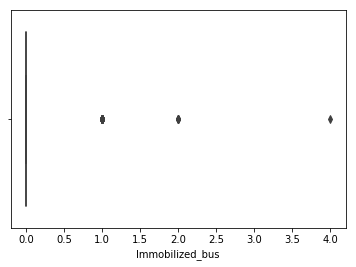

In [52]:
#checking outlier in Immobilized_bus
sns.boxplot(df.Immobilized_bus)

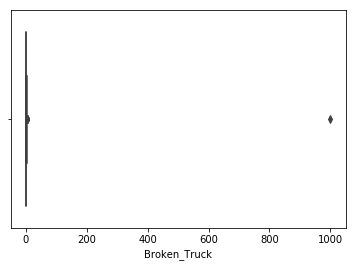

In [53]:
#cheking outlier in Broken_Truck
sns.boxplot(df.Broken_Truck)

In [54]:
#Here 1000 is outlier so lets remove it
df=df[df.Broken_Truck!=1000]

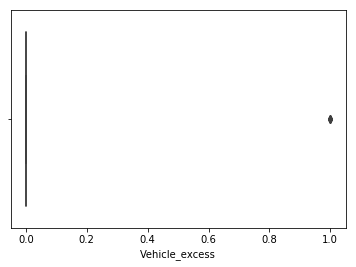

In [55]:
#checking outlier in Vehicle_excess
sns.boxplot(df.Vehicle_excess)
#No outlier detacted

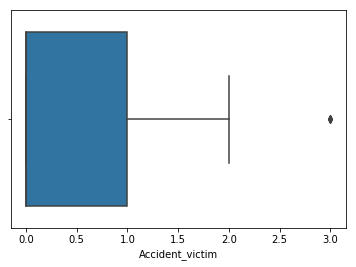

In [56]:
#cheking outiler in Accident_victim
sns.boxplot(df.Accident_victim)
#No outlier detacted

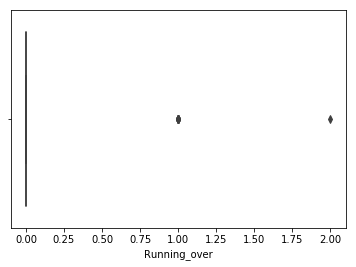

In [57]:
#checking outlier in Running_over
sns.boxplot(df.Running_over)
#No outlier detacted

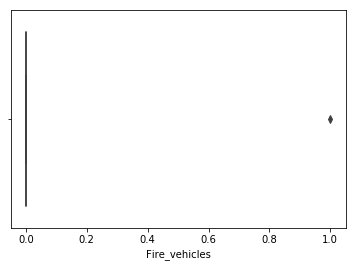

In [58]:
# #checking outlier in Fire_vehicles
sns.boxplot(df.Fire_vehicles)

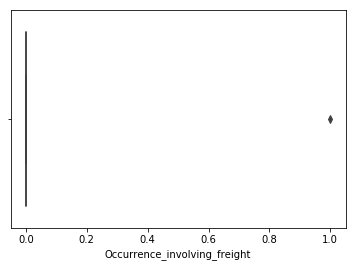

In [59]:
#checking outlier in Fire_vehicles
sns.boxplot(df.Occurrence_involving_freight)

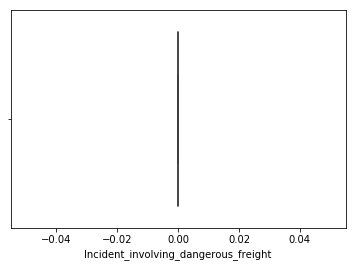

In [60]:
#checking outlier in Incident_involving_dangerous_freight
sns.boxplot(df.Incident_involving_dangerous_freight)

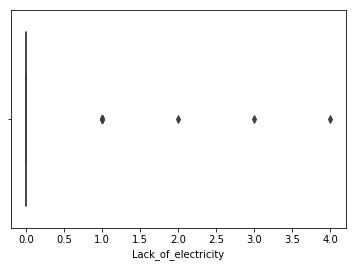

In [61]:
#checking outlier in Lack_of_electricity   
sns.boxplot(df.Lack_of_electricity)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 139
Data columns (total 18 columns):
Hour                                     136 non-null float64
Immobilized_bus                          136 non-null float64
Broken_Truck                             136 non-null float64
Vehicle_excess                           136 non-null int64
Accident_victim                          136 non-null float64
Running_over                             136 non-null float64
Fire_vehicles                            136 non-null float64
Occurrence_involving_freight             136 non-null float64
Incident_involving_dangerous_freight     136 non-null float64
Lack_of_electricity                      136 non-null float64
Fire                                     136 non-null float64
Point_of_flooding                        136 non-null float64
Manifestations                           136 non-null float64
Defect_in_the_network_of_trolleybuses    136 non-null float64
Tree_on_the_road             

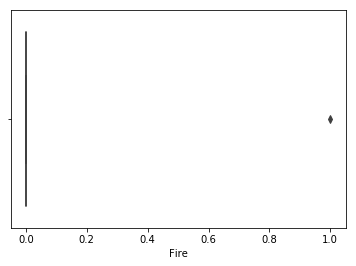

In [63]:
#checking outlier Fire
sns.boxplot(df.Fire)

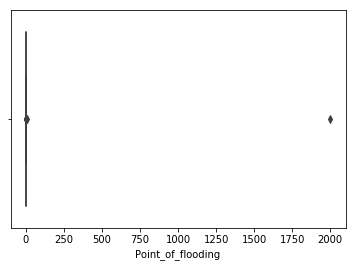

In [64]:
#checking outlier in Point_of_flooding
sns.boxplot(df.Point_of_flooding)

In [65]:
df.head(40)

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,7.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,7.5,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,8.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,8.5,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,9.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1
5,9.5,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9
6,10.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3
7,10.5,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.2
8,11.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.6
9,11.5,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.4


In [66]:
(df==2000).sum().sum()

1

In [67]:
#above 2000 is outlier so lets remove it.
df=df[df.Point_of_flooding!=2000]

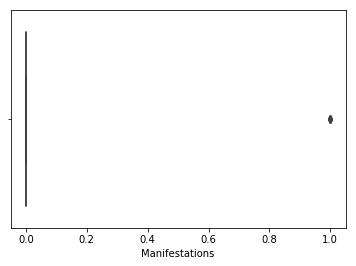

In [68]:
#checking outliers in Manifestations                           
sns.boxplot(df.Manifestations)
#no outliers detacted

In [69]:
df.Manifestations.unique()

array([0., 1.])

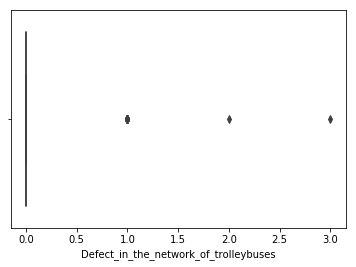

In [70]:
#checking outliers in Defect_in_the_network_of_trolleybuses
sns.boxplot(df.Defect_in_the_network_of_trolleybuses)
#no outliers detacted

In [71]:
df.Defect_in_the_network_of_trolleybuses.unique()

array([0., 1., 3., 2.])

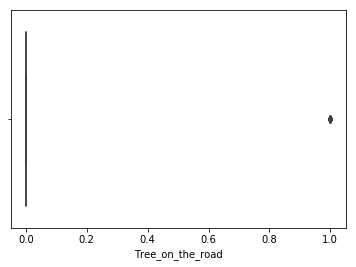

In [72]:
#checking outliers in Tree_on_the_road   
sns.boxplot(df.Tree_on_the_road)
#no outliers detacted

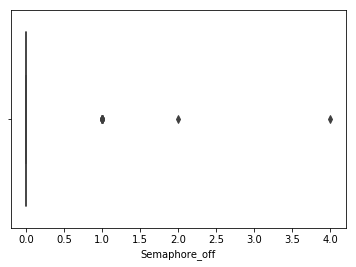

In [73]:
#checking outliers in Semaphore_off
sns.boxplot(df.Semaphore_off)
#no outliers detacted

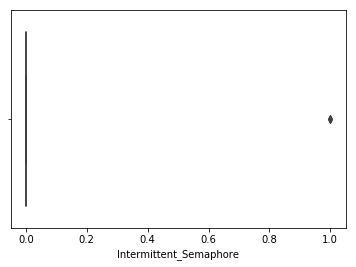

In [74]:
#checking outliers in Intermittent_Semaphore
sns.boxplot(df.Intermittent_Semaphore)
#no outliers detacted

In [75]:
df.Incident_involving_dangerous_freight.unique()

array([0.])

In [76]:
#Here we can see that Incident_involving_dangerous_freight all values are 0 .
#Therefore it is not going to make any difference on the model performance so let's remove this column
df=df.drop(['Incident_involving_dangerous_freight'],axis=1)

#### feature standalization

In [77]:
for feature in df.columns.values:
    if feature not in ['Slowness_in_traffic_percent']:
        print(feature,":",df[feature].unique())

Hour : [ 7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  13.  13.5 14.
 14.5 15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  12.5 15. ]
Immobilized_bus : [0. 2. 1. 4.]
Broken_Truck : [0. 2. 1. 5. 4. 3.]
Vehicle_excess : [1 0]
Accident_victim : [0. 1. 2. 3.]
Running_over : [0. 1. 2.]
Fire_vehicles : [0. 1.]
Occurrence_involving_freight : [0. 1.]
Lack_of_electricity : [0. 1. 2. 4. 3.]
Fire : [0. 1.]
Point_of_flooding : [0. 1. 3. 7.]
Manifestations : [0. 1.]
Defect_in_the_network_of_trolleybuses : [0. 1. 3. 2.]
Tree_on_the_road : [0. 1.]
Semaphore_off : [0. 1. 2. 4.]
Intermittent_Semaphore : [0. 1.]


In [78]:
#The Hour feature is not in the proper scale , TOmake it in  0 to 1 scale so lets do feature sacling on "Hour" feature
df.Hour=df.Hour.apply(lambda x:(x-df.Hour.min())/(df.Hour.max()-df.Hour.min()))

In [79]:
#Immobilized_bus 
df.Immobilized_bus =df.Immobilized_bus.apply(lambda x:(x-df.Immobilized_bus.min())/(df.Immobilized_bus.max()-df.Immobilized_bus.min())) 

In [80]:
#Broken_Truck
df.Broken_Truck=df.Broken_Truck.apply(lambda x:(x-df.Broken_Truck.min())/(df.Broken_Truck.max()-df.Broken_Truck.min()))


In [81]:
#Accident_victim
df.Accident_victim=df.Accident_victim.apply(lambda x:(x-df.Accident_victim.min())/(df.Accident_victim.max()-df.Accident_victim.min()))


In [82]:
#Lack_of_electricity
df.Lack_of_electricity=df.Lack_of_electricity.apply(lambda x:(x-df.Lack_of_electricity.min())/(df.Lack_of_electricity.max()-df.Lack_of_electricity.min()))


In [83]:
#Point_of_flooding
df.Point_of_flooding=df.Point_of_flooding.apply(lambda x:(x-df.Point_of_flooding.min())/(df.Point_of_flooding.max()-df.Point_of_flooding.min()))


In [84]:
#Defect_in_the_network_of_trolleybuses
df.Defect_in_the_network_of_trolleybuses=df.Defect_in_the_network_of_trolleybuses.apply(lambda x:(x-df.Defect_in_the_network_of_trolleybuses.min())/(df.Defect_in_the_network_of_trolleybuses.max()-df.Defect_in_the_network_of_trolleybuses.min()))


In [85]:
#Semaphore_off
df.Semaphore_off=df.Semaphore_off.apply(lambda x:(x-df.Semaphore_off.min())/(df.Semaphore_off.max()-df.Semaphore_off.min()))


In [86]:
df

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,0.000000,0.00,0.0,1,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,4.1
1,0.038462,0.00,0.0,0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,6.6
2,0.076923,0.00,0.0,0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,8.7
3,0.115385,0.00,0.0,0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,9.2
4,0.153846,0.00,0.0,0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,11.1
5,0.192308,0.00,0.0,0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,10.9
6,0.230769,0.00,0.0,0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,8.3
7,0.269231,0.00,0.0,0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,8.2
8,0.307692,0.00,0.0,0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,7.6
9,0.346154,0.00,0.0,0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,6.4


### Correlation

In [87]:
df.corr()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
Hour,1.000000,0.064872,0.125788,-0.152305,0.178979,-0.004089,0.122062,0.010797,0.238274,-0.044836,0.245179,-0.019341,-0.109249,-0.098044,0.219754,-0.166308,0.718043
Immobilized_bus,0.064872,1.000000,0.140888,0.150273,-0.029095,0.217645,0.093689,0.093689,0.068104,-0.043790,-0.051390,0.005085,0.133053,0.005085,0.014920,0.035417,0.097555
Broken_Truck,0.125788,0.140888,1.000000,-0.086171,0.279147,0.135948,0.009343,0.088178,0.106200,0.009343,0.141774,0.056128,0.162102,-0.009476,0.219523,-0.042691,0.117631
Vehicle_excess,-0.152305,0.150273,-0.086171,1.000000,0.044003,-0.064658,-0.016942,-0.016942,-0.046245,-0.016942,-0.032725,-0.042295,0.016421,-0.042295,-0.053414,-0.024049,-0.096989
Accident_victim,0.178979,-0.029095,0.279147,0.044003,1.000000,0.013450,0.066959,-0.051981,0.101608,-0.051981,0.043184,-0.129772,0.101106,-0.080283,0.122873,-0.073789,0.104442
Running_over,-0.004089,0.217645,0.135948,-0.064658,0.013450,1.000000,-0.028481,-0.028481,-0.034012,-0.028481,-0.024069,0.035551,0.077294,0.035551,-0.089794,0.141502,-0.001131
Fire_vehicles,0.122062,0.093689,0.009343,-0.016942,0.066959,-0.028481,1.000000,-0.007463,-0.020370,-0.007463,-0.014415,-0.018631,-0.031826,-0.018631,-0.023528,-0.010593,0.134186
Occurrence_involving_freight,0.010797,0.093689,0.088178,-0.016942,-0.051981,-0.028481,-0.007463,1.000000,-0.020370,-0.007463,-0.014415,0.400559,-0.031826,-0.018631,0.163313,-0.010593,0.026120
Lack_of_electricity,0.238274,0.068104,0.106200,-0.046245,0.101608,-0.034012,-0.020370,-0.020370,1.000000,-0.020370,0.334149,-0.050855,-0.020237,-0.050855,0.605162,-0.028916,0.437291
Fire,-0.044836,-0.043790,0.009343,-0.016942,-0.051981,-0.028481,-0.007463,-0.007463,-0.020370,1.000000,-0.014415,-0.018631,-0.031826,-0.018631,-0.023528,-0.010593,-0.047926


In [88]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

### Generating Kendall rank correlation matrix. It helps in getting correlation between continous, discrete and dummy(binary) variables. We can select features based on the correlation generated in the matrix.

In [89]:
corr = df.corr(method='kendall')

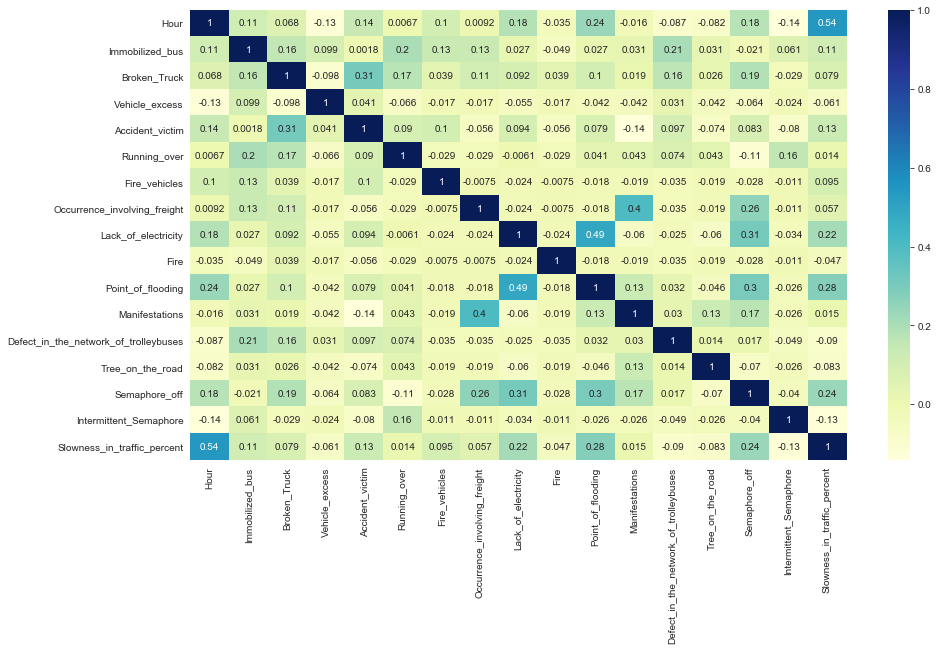

In [90]:
rcParams['figure.figsize'] = 14.7,8.27
sns.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

In [91]:
#lets calculate top correlated features with target(Slowness_in_traffic_percent)
corrArray= corr.abs().unstack()
corrArray=corrArray[:]['Slowness_in_traffic_percent']
topFeature = corrArray.sort_values(kind="quicksort",ascending=False)
topFeature[1:]

Hour                                     0.542358
Point_of_flooding                        0.277140
Semaphore_off                            0.235717
Lack_of_electricity                      0.215473
Accident_victim                          0.131274
Intermittent_Semaphore                   0.128254
Immobilized_bus                          0.109079
Fire_vehicles                            0.094913
Defect_in_the_network_of_trolleybuses    0.090422
Tree_on_the_road                         0.083161
Broken_Truck                             0.078688
Vehicle_excess                           0.061327
Occurrence_involving_freight             0.057496
Fire                                     0.046544
Manifestations                           0.015189
Running_over                             0.013552
dtype: float64

### Plotting the graphs for each feature and target variable to check the correlation visually

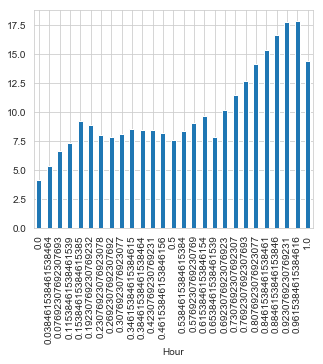

In [92]:
df.groupby('Hour').mean()['Slowness_in_traffic_percent'].plot(kind='Bar',figsize=[5,4])

### As we can see, the slowness in traffic depends on the hour. Also, the correlation of Hour and slowness in traffic is 0.54. So we select Hour as one of the feature. Similarly, we plot for all the features adn then compare there correlation.

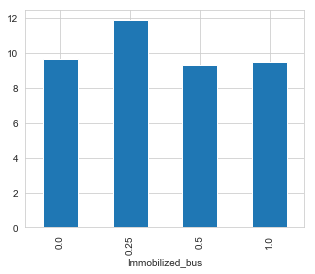

In [93]:
df.groupby('Immobilized_bus').mean()['Slowness_in_traffic_percent'].plot(kind='Bar',figsize=[5,4])

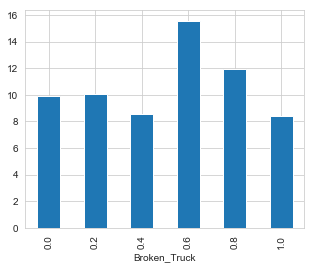

In [122]:
df.groupby('Broken_Truck').mean()['Slowness_in_traffic_percent'].plot(kind='Bar',figsize=[5,4])

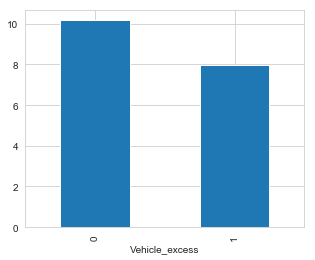

In [95]:
df.groupby('Vehicle_excess').mean()['Slowness_in_traffic_percent'].plot(kind='Bar',figsize=[5,4])

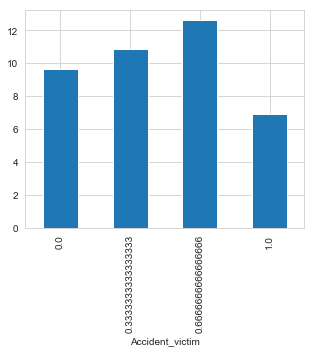

In [96]:
df.groupby('Accident_victim').mean()['Slowness_in_traffic_percent'].plot(kind='Bar',figsize=[5,4])

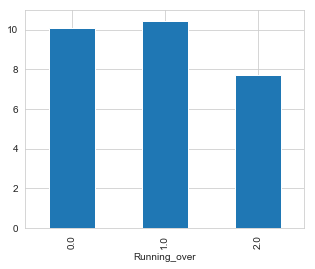

In [97]:
df.groupby('Running_over').mean()['Slowness_in_traffic_percent'].plot(kind='Bar',figsize=[5,4])

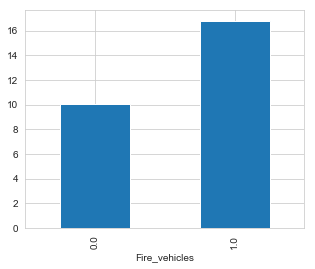

In [98]:
df.groupby('Fire_vehicles').mean()['Slowness_in_traffic_percent'].plot(kind='Bar',figsize=[5,4])

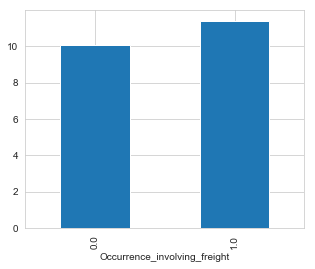

In [99]:
df.groupby('Occurrence_involving_freight').mean()['Slowness_in_traffic_percent'].plot(kind='Bar',figsize=[5,4])

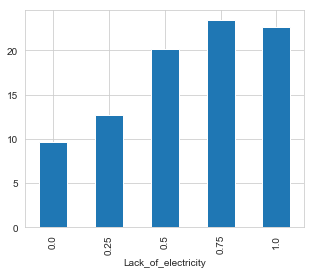

In [100]:
df.groupby('Lack_of_electricity').mean()['Slowness_in_traffic_percent'].plot(kind='Bar',figsize=[5,4])

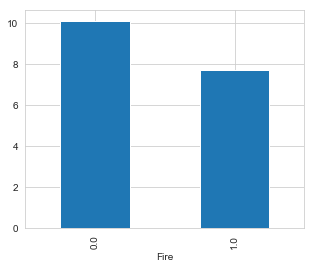

In [101]:
df.groupby('Fire').mean()['Slowness_in_traffic_percent'].plot(kind='Bar',figsize=[5,4])

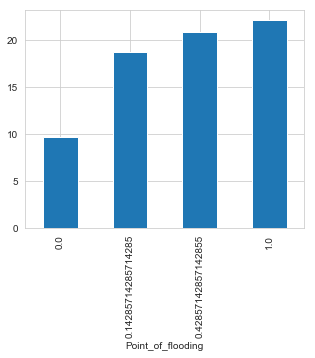

In [102]:
df.groupby('Point_of_flooding').mean()['Slowness_in_traffic_percent'].plot(kind='Bar',figsize=[5,4])

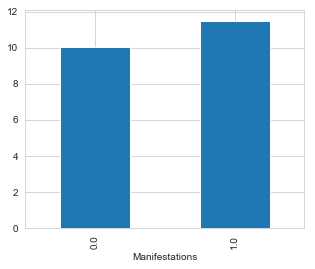

In [103]:
df.groupby('Manifestations').mean()['Slowness_in_traffic_percent'].plot(kind='Bar',figsize=[5,4])

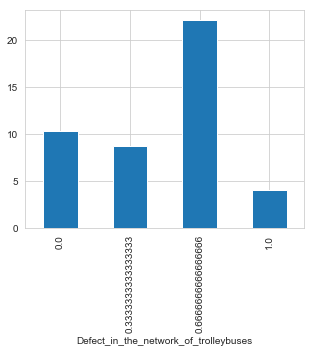

In [104]:
df.groupby('Defect_in_the_network_of_trolleybuses').mean()['Slowness_in_traffic_percent'].plot(kind='Bar',figsize=[5,4])

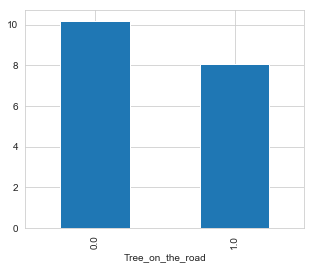

In [105]:
df.groupby('Tree_on_the_road').mean()['Slowness_in_traffic_percent'].plot(kind='Bar',figsize=[5,4])

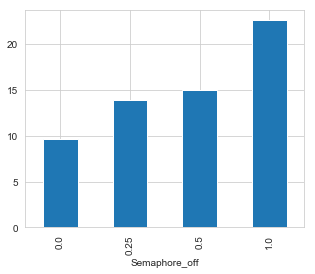

In [106]:
df.groupby('Semaphore_off').mean()['Slowness_in_traffic_percent'].plot(kind='Bar',figsize=[5,4])

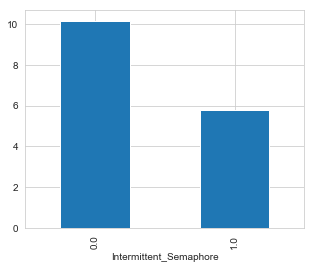

In [107]:
df.groupby('Intermittent_Semaphore').mean()['Slowness_in_traffic_percent'].plot(kind='Bar',figsize=[5,4])

In [108]:
#Selecting the top correlating features which have high correlation with target variable
df1=df.filter(['Point_of_flooding','Hour','Lack_of_electricity','Semaphore_off','Accident_victim','Intermittent_Semaphore','Immobilized_bus','Slowness_in_traffic_percent'])


In [109]:
#train feature
#featureSet=df1.filter(['Point_of_flooding','Broken_Truck','Hour','Lack_of_electricity','Semaphore_off','Accident_victim','Intermittent_Semaphore','Immobilized_bus'])
featureSet=df.drop(['Slowness_in_traffic_percent'],axis=1)
target=df.filter(['Slowness_in_traffic_percent'])

## Building Models for linear regression to predict slowness in traffic

### splitting the data in train and test data using test train method

In [110]:
x_train,x_test,y_train,y_test=train_test_split(featureSet,target,test_size=.20)

In [111]:
#creating LinearRegression object
model=LinearRegression()

In [112]:
#lets fit the model
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
y_predict=model.predict(x_test)

In [114]:
#lets try to figure out the performance of the model
model.score(x_test,y_test)

0.7022746579087221

###### Model creation with only highly correlated features.

In [115]:
### train feature
model1=LinearRegression()
featureSet1=df.filter(['Point_of_flooding','Hour','Lack_of_electricity','Semaphore_off','Accident_victim','Intermittent_Semaphore','Immobilized_bus'])
#featureSet1=df.filter(['Point_of_flooding','Broken_Truck','Hour','Lack_of_electricity'])
target1=df.filter(['Slowness_in_traffic_percent'])
x_train1,x_test1,y_train1,y_test1=train_test_split(featureSet1,target1,test_size=.20)
model1.fit(x_train1,y_train1)
print(model1.score(x_test1,y_test1))

0.5956578630242739


##### Model creation using Lasso Regression

In [116]:
from sklearn import linear_model
#train feature
#featureSet=df1.filter(['Point_of_flooding','Broken_Truck','Hour','Lack_of_electricity','Semaphore_off','Accident_victim','Intermittent_Semaphore','Immobilized_bus'])
featureSet2=df1.filter(['Point_of_flooding','Hour','Lack_of_electricity','Semaphore_off','Accident_victim','Intermittent_Semaphore','Immobilized_bus'])
target2=df1.filter(['Slowness_in_traffic_percent'])
#deviding train ,test  models
x_train2,x_test2,y_train2,y_test2=train_test_split(featureSet2,target2,test_size=.20)
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train2,y_train2)
clf.score(x_test2,y_test2)


0.38685382879776686

##### Model Evolution

In [117]:
print("MAE:",metrics.mean_absolute_error(y_test,y_predict))
print("MSE:",metrics.mean_squared_error(y_test,y_predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))


MAE: 1.9518638612446058
MSE: 5.713369734851108
RMSE: 2.3902656201458257


### recursive feature elimination (RFE) 

In [118]:
def getlistOfFeaturesUsingRFE(listOfRanking):
    index=0
    orderedList=[]
    for i in listOfRanking:
        if i ==1:
            orderedList.append(df.columns.values[index])
        index+=1
    return orderedList
       

In [119]:
def top_n_feature_selector_using_RFE(dataFrameObject):
    featureSet2=dataFrameObject.drop(['Slowness_in_traffic_percent'],axis=1)#.filter(['Point_of_flooding','Hour','Lack_of_electricity','Semaphore_off','Accident_victim','Intermittent_Semaphore','Immobilized_bus'])
    target2=dataFrameObject.filter(['Slowness_in_traffic_percent'])
    x_train2,x_test2,y_train2,y_test2=train_test_split(featureSet2,target2,test_size=.20)
    for noOfFeature in range(1,len(dataFrameObject.columns.values)):
        estimator = SVR(kernel="linear")
        selector = RFE(estimator, noOfFeature, step=1)
        selector = selector.fit(x_train2,y_train2)
        index=1
        print("When number of selected feature is "+str(noOfFeature))
        for feature in getlistOfFeaturesUsingRFE(selector.ranking_) :
            print(index,":",feature)
            index+=1
        print('Model score:',selector.score(x_test,y_test))

In [120]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    top_n_feature_selector_using_RFE(df)

When number of selected feature is 1
1 : Hour
Model score: 0.5227755356755788
When number of selected feature is 2
1 : Hour
2 : Semaphore_off
Model score: 0.6022318229257146
When number of selected feature is 3
1 : Hour
2 : Lack_of_electricity
3 : Semaphore_off
Model score: 0.6726721765159024
When number of selected feature is 4
1 : Hour
2 : Lack_of_electricity
3 : Point_of_flooding
4 : Semaphore_off
Model score: 0.6816030106208865
When number of selected feature is 5
1 : Hour
2 : Immobilized_bus
3 : Lack_of_electricity
4 : Point_of_flooding
5 : Semaphore_off
Model score: 0.7016714845451708
When number of selected feature is 6
1 : Hour
2 : Immobilized_bus
3 : Fire_vehicles
4 : Lack_of_electricity
5 : Point_of_flooding
6 : Semaphore_off
Model score: 0.7173466040347188
When number of selected feature is 7
1 : Hour
2 : Immobilized_bus
3 : Vehicle_excess
4 : Fire_vehicles
5 : Lack_of_electricity
6 : Point_of_flooding
7 : Semaphore_off
Model score: 0.7106556646347719
When number of selected